<font size=10>split1</font>

In [15]:
classes = ['001-CCTV1','019-fenghuangweishi','011-history_channel']

In [20]:
import os
import sys
import random
import xml.etree.ElementTree as ET

data_path = '/data/zhaozhiyuan/tb_variation/VOCdevkit_all'
img_path = os.path.join(data_path, 'VOC2007', 'JPEGImages')
anno_path = os.path.join(data_path, 'VOC2007', 'Annotations')
img_all = os.listdir(img_path)
img_index = [img.split('.')[0] for img in img_all]

f_trainval = open(os.path.join(data_path, 'VOC2007', 'ImageSets', 'Main', 'trainval3.txt'), 'w')
f_test_within_style = open(os.path.join(data_path, 'VOC2007', 'ImageSets', 'Main', 'test_within_style3.txt'), 'w')
f_test_across_style = open(os.path.join(data_path, 'VOC2007', 'ImageSets', 'Main', 'test_across_style3.txt'), 'w')

style_0 = [[] for i in range(len(classes))]
style_1 = [[] for i in range(len(classes))]
style_other = [[] for i in range(len(classes))]

random.shuffle(img_index)
for img in img_index:
    anno = ET.parse(os.path.join(anno_path, '{}.xml'.format(img)))
    name = anno.find('object').find('name').text
    style = int(anno.find('object').find('style').text)
    #print(name, style, img)
    if name in classes:
        index = classes.index(name)
        if style == 0:
            style_0[index].append(img)
        elif style == 1:
            style_1[index].append(img)
        else:
            style_other[index].append(img)
for i in range(len(classes)):
    print(classes[i], len(style_0[i]), len(style_1[i]), len(style_other[i]))

#sys.exit()
    
trainval, test_within_style, test_across_style = [], [], []
for i in range(len(classes)):
    all_within_style = style_0[i] + style_1[i]
    trainval += random.sample(all_within_style, 800)
    _test_within_style = [img for img in all_within_style if img not in trainval]
    test_within_style += _test_within_style
    test_across_style += style_other[i]
    print(classes[i], len(trainval), len(test_within_style), len(test_across_style))
    
for img in trainval:
    f_trainval.write(img + '\n')
f_trainval.close()
for img in test_within_style:
    f_test_within_style.write(img + '\n')
f_test_within_style.close()
for img in test_across_style:
    f_test_across_style.write(img + '\n')
f_test_across_style.close()

001-CCTV1 797 800 1370
019-fenghuangweishi 745 768 1564
011-history_channel 757 714 675
001-CCTV1 800 797 1370
019-fenghuangweishi 1600 1510 2934
011-history_channel 2400 2181 3609


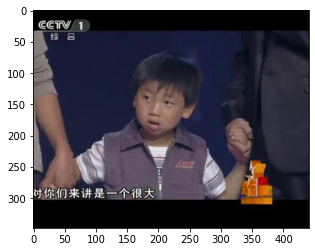

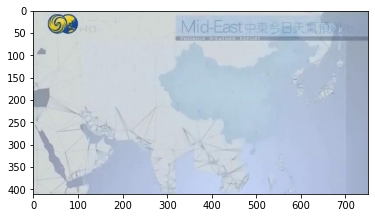

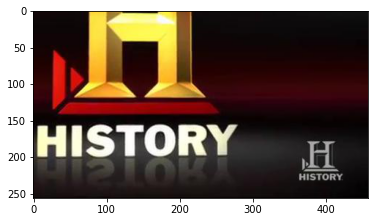

In [70]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

imgs = ['000565', '054646', '058428']
for img in imgs:
    pic = mpimg.imread('/data/zhaozhiyuan/tb_variation/VOCdevkit_all/VOC2007/JPEGImages/{}.jpg'.format(img))
    plt.imshow(pic)
    plt.show()

<font size=10>other splits</font>

In [28]:
import random
CLASSES = ['002-beijingweishi', '003-tianjinweishi', '004-CNN', '005-shandongweishi', '006-henanweishi', '007-guangdongweishi', '008-shenzhenweishi', '010-sichuanweishi', '014-VOA', '016-CBS', '017-KTN', '018-NOWTHIS', '015-DWTV', '019-TVBS', '020-tbs']

<font size=10>split2</font>

In [30]:
split2 = random.sample(CLASSES, 3)
CLASSES = [CLASS for CLASS in CLASSES if CLASS not in split2]
split2

['018-NOWTHIS', '005-shandongweishi', '019-TVBS']

In [31]:
import os
import sys
import random
import xml.etree.ElementTree as ET

data_path = '/data/zhaozhiyuan/tb_variation/VOCdevkit_all'
img_path = os.path.join(data_path, 'VOC2007', 'JPEGImages')
anno_path = os.path.join(data_path, 'VOC2007', 'Annotations')
img_all = os.listdir(img_path)
img_index = [img.split('.')[0] for img in img_all]

if not os.path.exists(os.path.join(data_path, 'VOC2007', 'ImageSets', 'Main', 'split2')):
    os.mkdir(os.path.join(data_path, 'VOC2007', 'ImageSets', 'Main', 'split2'))
f_trainval = open(os.path.join(data_path, 'VOC2007', 'ImageSets', 'Main', 'split2', 'trainval3.txt'), 'w')
f_test_within_style = open(os.path.join(data_path, 'VOC2007', 'ImageSets', 'Main', 'split2', 'test_within_style3.txt'), 'w')
f_test_across_style = open(os.path.join(data_path, 'VOC2007', 'ImageSets', 'Main', 'split2', 'test_across_style3.txt'), 'w')

style_0 = [[] for i in range(len(split2))]
style_1 = [[] for i in range(len(split2))]
style_other = [[] for i in range(len(split2))]

random.shuffle(img_index)
for img in img_index:
    anno = ET.parse(os.path.join(anno_path, '{}.xml'.format(img)))
    name = anno.find('object').find('name').text
    style = int(anno.find('object').find('style').text)
    #print(name, style, img)
    if name in split2:
        index = split2.index(name)
        if style == 0:
            style_0[index].append(img)
        elif style == 1:
            style_1[index].append(img)
        else:
            style_other[index].append(img)
for i in range(len(split2)):
    print(split2[i], len(style_0[i]), len(style_1[i]), len(style_other[i]))

#sys.exit()
    
trainval, test_within_style, test_across_style = [], [], []
for i in range(len(split2)):
    all_within_style = style_0[i] + style_1[i]
    trainval += random.sample(all_within_style, int(len(all_within_style) / 2))
    _test_within_style = [img for img in all_within_style if img not in trainval]
    test_within_style += _test_within_style
    test_across_style += style_other[i]
    print(split2[i], len(trainval), len(test_within_style), len(test_across_style))
    
for img in trainval:
    f_trainval.write(img + '\n')
f_trainval.close()
for img in test_within_style:
    f_test_within_style.write(img + '\n')
f_test_within_style.close()
for img in test_across_style:
    f_test_across_style.write(img + '\n')
f_test_across_style.close()

018-NOWTHIS 636 395 799
005-shandongweishi 787 719 3190
019-TVBS 775 794 771
018-NOWTHIS 515 516 799
005-shandongweishi 1268 1269 3989
019-TVBS 2052 2054 4760


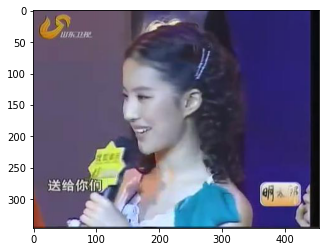

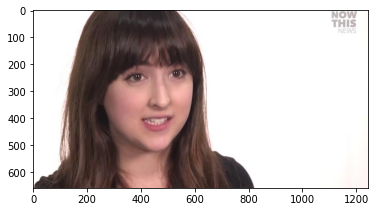

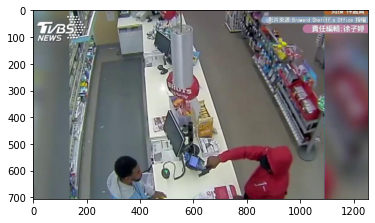

In [36]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

"""
choose : 018504, 041796, 046430
"""

imgs = ['018504', '041796', '046430']
for img in imgs:
    pic = mpimg.imread('/data/zhaozhiyuan/tb_variation/VOCdevkit_all/VOC2007/JPEGImages/{}.jpg'.format(img))
    plt.imshow(pic)
    plt.show()


<font size=10>split3<font>

In [37]:
split3 = random.sample(CLASSES, 3)
CLASSES = [CLASS for CLASS in CLASSES if CLASS not in split3]
split3

['010-sichuanweishi', '015-DWTV', '004-CNN']

In [38]:
import os
import sys
import random
import xml.etree.ElementTree as ET

data_path = '/data/zhaozhiyuan/tb_variation/VOCdevkit_all'
img_path = os.path.join(data_path, 'VOC2007', 'JPEGImages')
anno_path = os.path.join(data_path, 'VOC2007', 'Annotations')
img_all = os.listdir(img_path)
img_index = [img.split('.')[0] for img in img_all]

if not os.path.exists(os.path.join(data_path, 'VOC2007', 'ImageSets', 'Main', 'split3')):
    os.mkdir(os.path.join(data_path, 'VOC2007', 'ImageSets', 'Main', 'split3'))
f_trainval = open(os.path.join(data_path, 'VOC2007', 'ImageSets', 'Main', 'split3', 'trainval3.txt'), 'w')
f_test_within_style = open(os.path.join(data_path, 'VOC2007', 'ImageSets', 'Main', 'split3', 'test_within_style3.txt'), 'w')
f_test_across_style = open(os.path.join(data_path, 'VOC2007', 'ImageSets', 'Main', 'split3', 'test_across_style3.txt'), 'w')

style_0 = [[] for i in range(len(split3))]
style_1 = [[] for i in range(len(split3))]
style_other = [[] for i in range(len(split3))]

random.shuffle(img_index)
for img in img_index:
    anno = ET.parse(os.path.join(anno_path, '{}.xml'.format(img)))
    name = anno.find('object').find('name').text
    style = int(anno.find('object').find('style').text)
    #print(name, style, img)
    if name in split3:
        index = split3.index(name)
        if style == 0:
            style_0[index].append(img)
        elif style == 1:
            style_1[index].append(img)
        else:
            style_other[index].append(img)
for i in range(len(split3)):
    print(split3[i], len(style_0[i]), len(style_1[i]), len(style_other[i]))

#sys.exit()
    
trainval, test_within_style, test_across_style = [], [], []
for i in range(len(split3)):
    all_within_style = style_0[i] + style_1[i]
    trainval += random.sample(all_within_style, int(len(all_within_style) / 2))
    _test_within_style = [img for img in all_within_style if img not in trainval]
    test_within_style += _test_within_style
    test_across_style += style_other[i]
    print(split3[i], len(trainval), len(test_within_style), len(test_across_style))
    
for img in trainval:
    f_trainval.write(img + '\n')
f_trainval.close()
for img in test_within_style:
    f_test_within_style.write(img + '\n')
f_test_within_style.close()
for img in test_across_style:
    f_test_across_style.write(img + '\n')
f_test_across_style.close()

010-sichuanweishi 798 800 1600
015-DWTV 794 800 781
004-CNN 783 726 1590
010-sichuanweishi 799 799 1600
015-DWTV 1596 1596 2381
004-CNN 2350 2351 3971


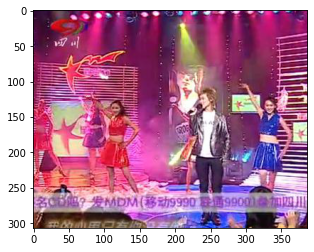

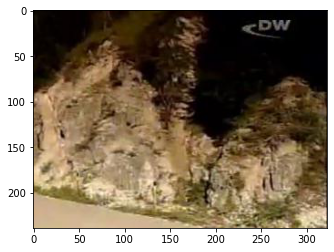

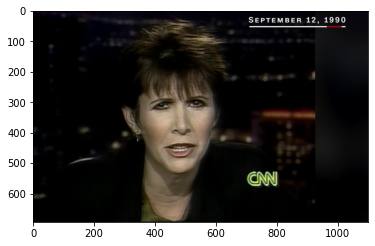

In [48]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

"""
choose : 026316, 042231, 013972
"""

imgs = ['026316', '042231', '013972']
for img in imgs:
    pic = mpimg.imread('/data/zhaozhiyuan/tb_variation/VOCdevkit_all/VOC2007/JPEGImages/{}.jpg'.format(img))
    plt.imshow(pic)
    plt.show()


<font size=10>split4</font>

In [49]:
split4 = random.sample(CLASSES, 3)
CLASSES = [CLASS for CLASS in CLASSES if CLASS not in split4]
split4

['003-tianjinweishi', '014-VOA', '020-tbs']

In [50]:
import os
import sys
import random
import xml.etree.ElementTree as ET

data_path = '/data/zhaozhiyuan/tb_variation/VOCdevkit_all'
img_path = os.path.join(data_path, 'VOC2007', 'JPEGImages')
anno_path = os.path.join(data_path, 'VOC2007', 'Annotations')
img_all = os.listdir(img_path)
img_index = [img.split('.')[0] for img in img_all]

if not os.path.exists(os.path.join(data_path, 'VOC2007', 'ImageSets', 'Main', 'split4')):
    os.mkdir(os.path.join(data_path, 'VOC2007', 'ImageSets', 'Main', 'split4'))
f_trainval = open(os.path.join(data_path, 'VOC2007', 'ImageSets', 'Main', 'split4', 'trainval3.txt'), 'w')
f_test_within_style = open(os.path.join(data_path, 'VOC2007', 'ImageSets', 'Main', 'split4', 'test_within_style3.txt'), 'w')
f_test_across_style = open(os.path.join(data_path, 'VOC2007', 'ImageSets', 'Main', 'split4', 'test_across_style3.txt'), 'w')

style_0 = [[] for i in range(len(split4))]
style_1 = [[] for i in range(len(split4))]
style_other = [[] for i in range(len(split4))]

random.shuffle(img_index)
for img in img_index:
    anno = ET.parse(os.path.join(anno_path, '{}.xml'.format(img)))
    name = anno.find('object').find('name').text
    style = int(anno.find('object').find('style').text)
    #print(name, style, img)
    if name in split4:
        index = split4.index(name)
        if style == 0:
            style_0[index].append(img)
        elif style == 1:
            style_1[index].append(img)
        else:
            style_other[index].append(img)
for i in range(len(split4)):
    print(split4[i], len(style_0[i]), len(style_1[i]), len(style_other[i]))

#sys.exit()
    
trainval, test_within_style, test_across_style = [], [], []
for i in range(len(split4)):
    all_within_style = style_0[i] + style_1[i]
    trainval += random.sample(all_within_style, int(len(all_within_style) / 2))
    _test_within_style = [img for img in all_within_style if img not in trainval]
    test_within_style += _test_within_style
    test_across_style += style_other[i]
    print(split4[i], len(trainval), len(test_within_style), len(test_across_style))
    
for img in trainval:
    f_trainval.write(img + '\n')
f_trainval.close()
for img in test_within_style:
    f_test_within_style.write(img + '\n')
f_test_within_style.close()
for img in test_across_style:
    f_test_across_style.write(img + '\n')
f_test_across_style.close()

003-tianjinweishi 796 791 800
014-VOA 822 755 810
020-tbs 800 795 1600
003-tianjinweishi 793 794 800
014-VOA 1581 1583 1610
020-tbs 2378 2381 3210


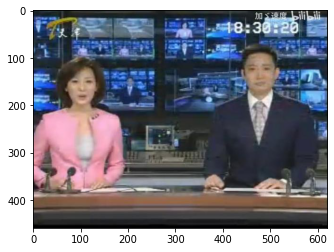

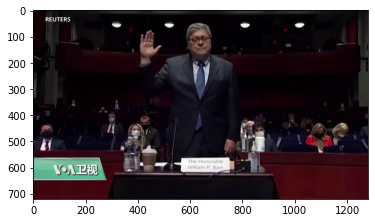

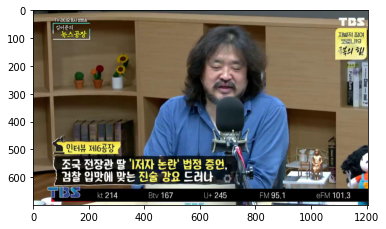

In [54]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

"""
choose : 008576, 029838, 051449
"""

imgs = ['008576', '029838', '051449']
for img in imgs:
    pic = mpimg.imread('/data/zhaozhiyuan/tb_variation/VOCdevkit_all/VOC2007/JPEGImages/{}.jpg'.format(img))
    plt.imshow(pic)
    plt.show()


<font size=10>split5</font>

In [55]:
split5 = random.sample(CLASSES, 3)
CLASSES = [CLASS for CLASS in CLASSES if CLASS not in split5]
split5

['017-KTN', '007-guangdongweishi', '016-CBS']

In [61]:
import os
import sys
import random
import xml.etree.ElementTree as ET

data_path = '/data/zhaozhiyuan/tb_variation/VOCdevkit_all'
img_path = os.path.join(data_path, 'VOC2007', 'JPEGImages')
anno_path = os.path.join(data_path, 'VOC2007', 'Annotations')
img_all = os.listdir(img_path)
img_index = [img.split('.')[0] for img in img_all]

if not os.path.exists(os.path.join(data_path, 'VOC2007', 'ImageSets', 'Main', 'split5')):
    os.mkdir(os.path.join(data_path, 'VOC2007', 'ImageSets', 'Main', 'split5'))
f_trainval = open(os.path.join(data_path, 'VOC2007', 'ImageSets', 'Main', 'split5', 'trainval3.txt'), 'w')
f_test_within_style = open(os.path.join(data_path, 'VOC2007', 'ImageSets', 'Main', 'split5', 'test_within_style3.txt'), 'w')
f_test_across_style = open(os.path.join(data_path, 'VOC2007', 'ImageSets', 'Main', 'split5', 'test_across_style3.txt'), 'w')

style_0 = [[] for i in range(len(split5))]
style_1 = [[] for i in range(len(split5))]
style_other = [[] for i in range(len(split5))]

random.shuffle(img_index)
for img in img_index:
    anno = ET.parse(os.path.join(anno_path, '{}.xml'.format(img)))
    name = anno.find('object').find('name').text
    style = int(anno.find('object').find('style').text)
    #print(name, style, img)
    if name in split5:
        index = split5.index(name)
        if style == 0:
            style_0[index].append(img)
        elif style == 1:
            style_1[index].append(img)
        else:
            style_other[index].append(img)
            
#sample for CBS
#print(len(style_other[1]))
style_other[2] = random.sample(style_other[2], 1000)

for i in range(len(split5)):
    print(split5[i], len(style_0[i]), len(style_1[i]), len(style_other[i]))

#sys.exit()
    
trainval, test_within_style, test_across_style = [], [], []
for i in range(len(split5)):
    all_within_style = style_0[i] + style_1[i]
    trainval += random.sample(all_within_style, int(len(all_within_style) / 2))
    _test_within_style = [img for img in all_within_style if img not in trainval]
    test_within_style += _test_within_style
    test_across_style += style_other[i]
    print(split5[i], len(trainval), len(test_within_style), len(test_across_style))
    
for img in trainval:
    f_trainval.write(img + '\n')
f_trainval.close()
for img in test_within_style:
    f_test_within_style.write(img + '\n')
f_test_within_style.close()
for img in test_across_style:
    f_test_across_style.write(img + '\n')
f_test_across_style.close()

017-KTN 800 800 800
007-guangdongweishi 551 800 799
016-CBS 799 800 1000
017-KTN 800 800 800
007-guangdongweishi 1475 1476 1599
016-CBS 2274 2276 2599


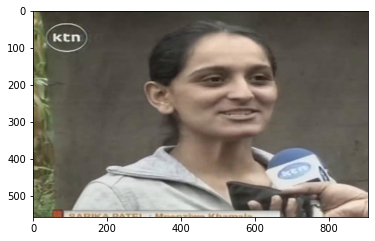

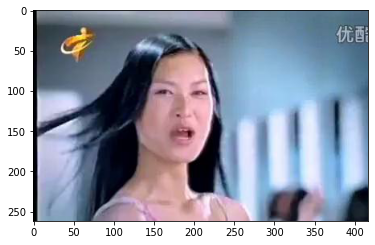

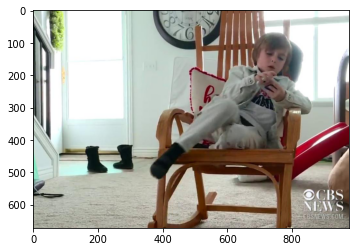

In [66]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

"""
choose : 038375, 021865, 033304
"""

imgs = ['038375', '021865', '033304']
for img in imgs:
    pic = mpimg.imread('/data/zhaozhiyuan/tb_variation/VOCdevkit_all/VOC2007/JPEGImages/{}.jpg'.format(img))
    plt.imshow(pic)
    plt.show()


In [68]:
split6 = random.sample(CLASSES, 3)
CLASSES = [CLASS for CLASS in CLASSES if CLASS not in split5]
split5

ValueError: Sample larger than population or is negative

<font size=10>test itv</font> 

In [27]:
import shutil

os.mkdir('/data/zhaozhiyuan/tb_variation/test_itv')
data_path = '/data/zhaozhiyuan/tb_variation/VOCdevkit_all'
img_path = os.path.join(data_path, 'VOC2007', 'JPEGImages')
anno_path = os.path.join(data_path, 'VOC2007', 'Annotations')
img_all = os.listdir(img_path)
img_index = [img.split('.')[0] for img in img_all]
count = 0
for img in img_index:
    anno = ET.parse(os.path.join(anno_path, '{}.xml'.format(img)))
    name = anno.find('object').find('name').text
    style = int(anno.find('object').find('style').text)
    if name == '017-iTV' and style == 0:
        shutil.copyfile(
            src = os.path.join(data_path, 'VOC2007', 'JPEGImages', '{}.jpg'.format(img)),
            dst = os.path.join('/data/zhaozhiyuan/tb_variation/test_itv/{}.jpg'.format(img))
        )
        count += 1
print(count)

1494
